In [124]:
''' 
-supervised learning python 2
-netflix sotck data
The features are the descriptive attributes
and the label is what you're attempting to predict or forecast.
As such, our features are actually: current price, 
high minus low percent, and the percent change volatility.
'''
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime, time

#import matplotlib.pyplot as plt
import quandl
import pandas as pd
csv_obj = quandl.get("WIKI/nflx")
#csv_obj = pd.read_csv('nflx.csv',  encoding='utf-8-sig')
#csv_obj

In [135]:
#new col: HL_PCT high - low percent
csv_obj["HL_PCT"]= (csv_obj["Adj. High"] - csv_obj["Adj. Close"]) / csv_obj['Adj. Close'] * 100.0
#new col: pct chane new - old / old * 100
csv_obj["PCT_DALY_CHANGE"]= (csv_obj["Adj. Close"] - csv_obj["Adj. Open"]) / csv_obj['Adj. Open'] * 100.0
#csv_obj.plot(kind='scatter', x='Adj. High', y='Adj. Close', figsize=(12,8))
#plt.show()



In [111]:
 
csv_obj = csv_obj[["Adj. Close","HL_PCT","PCT_DALY_CHANGE", "Volume"]]
#featurs
#csv_obj.plot(kind='scatter', x='', y='', figsize=(12,8)) 
#plt.show()

In [112]:
#prediction_col
forecast_col = 'Adj. Close'
#replacing NAN data
csv_obj.fillna(-99999, inplace=True)


In [113]:
import math
#We're saying we want to forecast out 1% of the entire length of the dataset. 
#using data to forecast 10 days into the future
forecast_out = int(math.ceil(0.01*len(csv_obj)))#math.celi rounds up to the nearest whole
forecast_out

38

In [114]:
csv_obj['label'] = csv_obj[forecast_col].shift(-forecast_out)


In [115]:
import numpy as np

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

In [116]:
X = np.array(csv_obj.drop(['label'],1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]

X = X[:-forecast_out:]




csv_obj.dropna(inplace=True)


In [117]:
#featurs
#X = np.array(csv_obj.drop(['label'], 1))
y = np.array(csv_obj['label'])


In [118]:
#X = preprocessing.scale(X)
#y = np.array(csv_obj['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [138]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [120]:
confidence = clf.score(X_test, y_test)
confidence

0.96134856338528718

(array([ 129.36743752,  131.38307582,  131.21976843,  132.10715733,
        131.65180782,  132.14855742,  134.34443352,  131.92585907,
        131.53565776,  129.73059623,  132.50219575,  134.866767  ,
        136.98498067,  135.9504214 ,  136.90133121,  135.76071327,
        136.47089722,  135.13199262,  138.75348316,  137.62290086,
        137.92307221,  140.76956926,  144.11042492,  143.3242975 ,
        146.10436751,  145.56083681,  145.25276703,  148.43313252,
        147.13686997,  147.4729128 ,  147.18054042,  146.09247639,
        147.18996268,  147.92814742,  149.9790348 ,  151.11452662,
        150.99655476,  151.49501526]), 0.96134856338528718, 38)


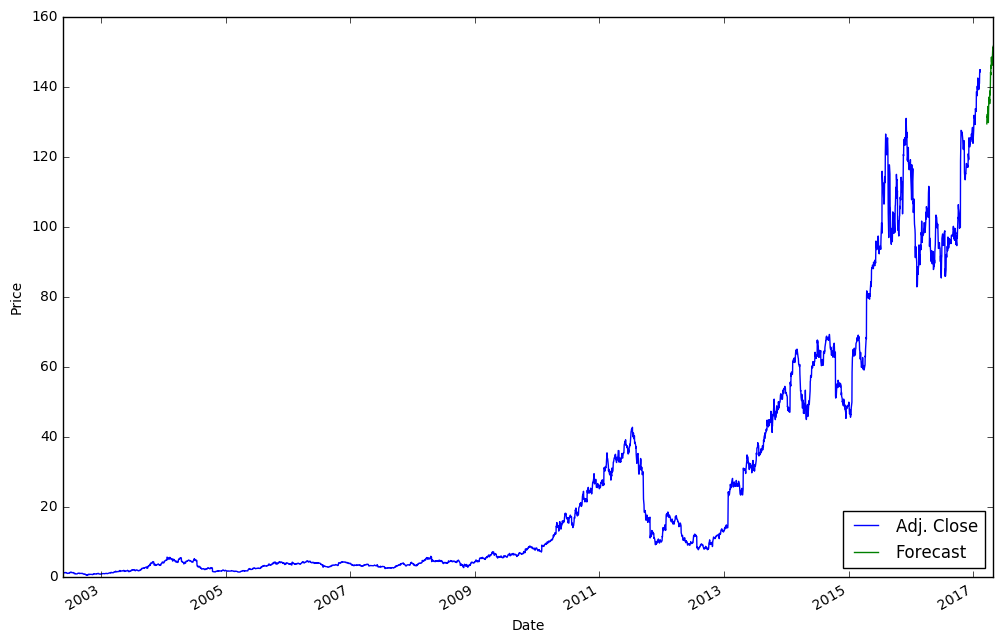

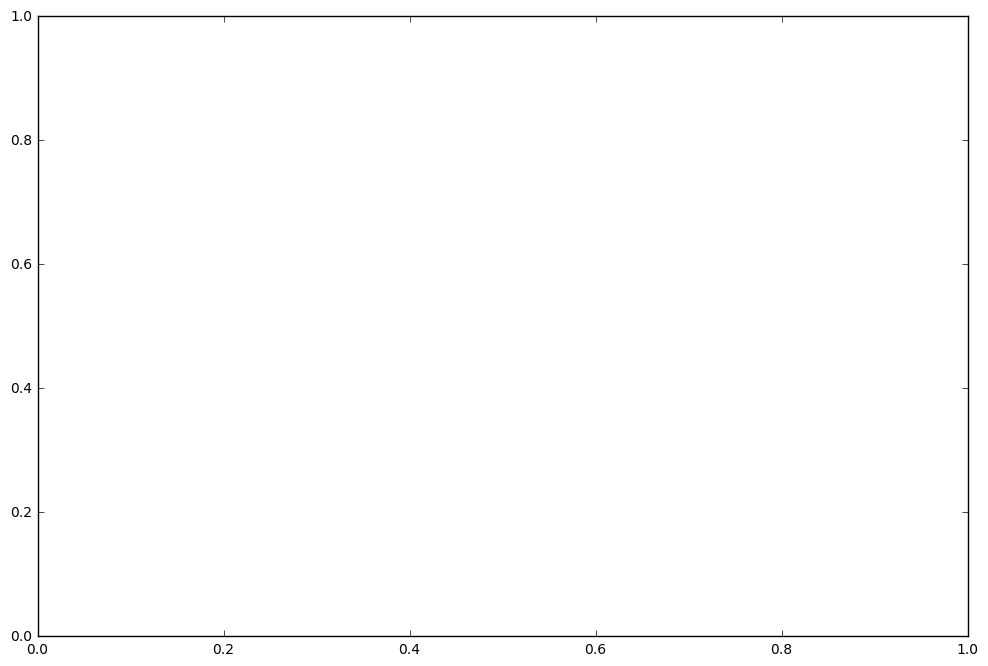

In [140]:


forecast_set = clf.predict(X_lately)
csv_obj['Forecast'] = np.nan

print(forecast_set, confidence, forecast_out)


last_date = csv_obj.iloc[-1].name
last_unix = time.mktime(last_date.timetuple())
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    csv_obj.loc[next_date] = [np.nan for _ in range(len(csv_obj.columns)-1)]+[i]
    
csv_obj['Adj. Close'].plot()
csv_obj['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
#plt.subplots(figsize=(12,8))  
#plt.plot(kind='scatter', x='Date', y='Price', figsize=(12,8))
#plt.show()